## 1.Load Task in Benchmark Quickly

Tutorial one is to load a task/env conveniently by simply giving task name and desired target embodiment (default is Franka).

In [ ]:
import os
os.environ["MUJOCO_GL"] = "egl"  # If run this tutorial on server instead of PC, run in headless mode.
from PIL import Image
from dm_control import viewer
from VLABench.envs import load_env
from VLABench.robots import *
from VLABench.tasks import *

/home/hbuurmei/Documents/VLABench/.venv/lib/python3.11/site-packages/glfw/__init__.py:917: GLFWError: (65550) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
/home/hbuurmei/Documents/VLABench/.venv/lib/python3.11/site-packages/dash/_jupyter.py:30: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Set the embodiment and task 

In [2]:
task = "select_fruit"
robot = "franka"

###  1.1Load task and build environment

Each time you load the single env, each instance varies in a large range.

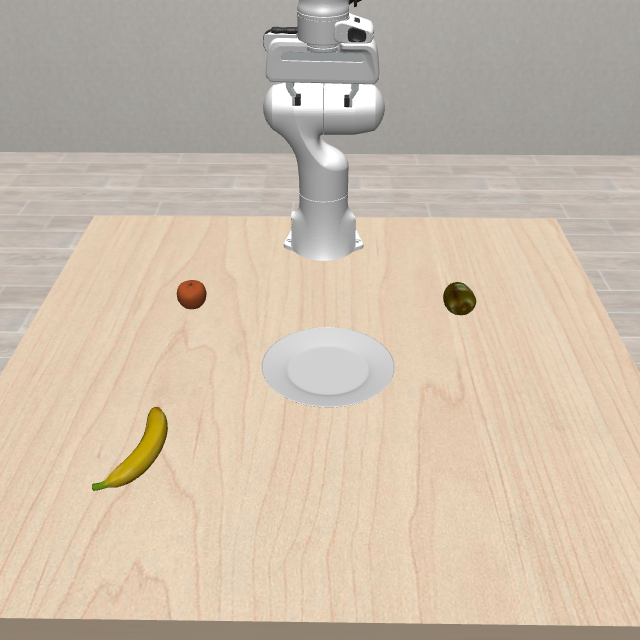

In [3]:
env = load_env(task, robot=robot, time_limit=1000)
env.reset()

image = env.render(camera_id=2, width=640, height=640)
Image.fromarray(image)

In [ ]:
obs=env.get_observation()
obs

### 1.2Run in interactive viewer

In [ ]:
viewer.launch(env)

## 2.Overview of Primitive Tasks

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

def plot_images(images, instructions, titles, max_columns=5, max_text_width=30):
    assert len(images) == len(instructions) == len(titles), "images should have the same length as instructions and titles"
    num_images = len(images)
    num_rows = (num_images + max_columns - 1) // max_columns
    fig, axes = plt.subplots(num_rows, max_columns, figsize=(max_columns * 3, num_rows * 3))
    axes = axes.flatten()
    for i, (image, instruction, title) in enumerate(zip(images, instructions, titles)):
        if np.max(image) <= 1:
            image = (image * 255).astype(np.uint8)
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(title, fontsize=14)
        wrapped_instruction = textwrap.fill(instruction, width=max_text_width)
        ax.text(0.5, -0.1, wrapped_instruction, ha='center', va='top', transform=ax.transAxes, fontsize=12)
        
    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
def load_env_and_render(task, robot, **kwargs):
    env = load_env(task, robot=robot, **kwargs)
    env.reset()

    image = env.render(camera_id=2, width=480, height=480)
    instruction = env.task.get_instruction()
    return image, instruction

### 2.1 Basic Scene: Mesh&Texture 

Default Setting: no additional domain randomization, no texture and scene augmenation

In [ ]:
tasks_to_load = ["select_toy", "select_fruit", "select_chemistry_tube", "select_mahjong", "select_poker", "add_condiment", "insert_flower", "select_book", "select_billiards", "select_drink", "select_ingredient", "select_painting","put_box_on_painting"]
images, instructions = [], []
for task in tasks_to_load:
    try:
        image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
        images.append(image)
        instructions.append(instruction)
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Failed to load task {task}: {e}")
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)


### 2.2 Common Sense & World Knowledge

The base environment for Common Sense & World Knowledge type tasks quering LLM to generate task instructions by default. We also recommend to generate the instructions in batch later.

In [ ]:
tasks_to_load = ["hammer_loose_nail"]

### 2.3 Spatial Understanding

The base environment for spatial understanding generate the relative spatial relationships between target entity and other entities by task-specific rules.

In [ ]:
tasks_to_load = ["select_toy_spatial", "select_fruit_spatial", "select_chemistry_tube_spatial", "select_mahjong_spatial", "select_poker_spatial", "add_condiment_spatial", "insert_flower_spatial", "select_book_spatial", "select_billiards_spatial", "select_drink_spatial", "select_ingredient_spatial"]
# "", "select_poker", "add_condiment", "insert_flower", "select_book", "select_billiards", "select_drink", "select_ingredient", "select_painting","put_box_on_painting"
images, instructions = [], []
robot="franka"
for task in tasks_to_load:
    try:
        image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
        images.append(image)
        instructions.append(instruction)
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Failed to load task {task}: {e}")
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)

### 2.4 Semantic Understanding

In [ ]:
tasks_to_load = ["select_toy_semantic", "select_fruit_semantic"]
for task in tasks_to_load:
    try:
        image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
        images.append(image)
        instructions.append(instruction)
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Failed to load task {task}: {e}")


In [ ]:
instructions

## 3.Overview of Composite Tasks

### 3.1Cluster series tasks

In [ ]:
tasks_to_load = ["cluster_book", "cluster_billiards", "cluster_toy", "cluster_dessert", "cluster_drink", "cluster_ingredients"]
images, instructions = [], []
for task in tasks_to_load:
    image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
    images.append(image)
    instructions.append(instruction)
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)

### 3.2 Other Composite Tasks 

In [ ]:
tasks_to_load = ["texas_holdem", "texas_holdem_explore", "set_dining_table", "set_dining_left_hand", "set_dining_chopstick", "find_unseen_object", "cool_drink", "take_out_cool_drink", "book_rearrange", "heat_food", "rearrange_tube", "take_chemistry_experiment", "get_coffee", "get_coffee_with_sugar", "get_coffee_with_milk", "hammer_nail_and_hang_picture", "make_juice", "cook_dishes", "store_food", "play_mahjong", "complex_seesaw_use", "play_math_game", "set_study_table"]
images, instructions = [], []
for task in tasks_to_load:
    image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
    images.append(image)
    instructions.append(instruction)
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)